# OCR with classification
> Jakub Darul, MOwNiT Lab9

In [1]:
import numpy as np
from functional import seq
import string
import os
from functional import seq

In [2]:
from image_processing.commons import *
from image_processing.generating import *
from image_processing.paragraph import *
from image_processing.line import *
from notebook_helpers import *
from image_processing.classification_helpers import *
from image_processing.classification import *
from image_processing.composed import *
from image_processing.word import word_to_letters

/home/jacko/.local/lib/python3.5/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


Using TensorFlow backend.


In [3]:
txt = """
SAMPSON
  Gregory, o’ my word, we’ll not carry coals.
GREGORY
  No, for then we should be colliers.
SAMPSON
  I mean, an we be in choler, we’ll draw.
GREGORY
  Ay, while you live, draw your neck out 
o’ the collar.
SAMPSON
  I strike quickly, being moved.
GREGORY
  But thou art not quickly moved to strike.
SAMPSON
  A dog of the house of Montague moves me.
GREGORY
  To move is to stir; and to be valiant is to 
stand: therefore, if thou art moved, thou runn’st away.""".lower().replace("’","").replace(";","").replace(":","")


text = text_img(txt,(1500,1500))

In [4]:
rotated = rotate(np.asarray(text), 35)*255

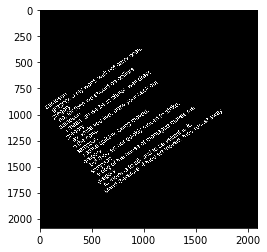

In [5]:
plot_gray(rotated)

In [6]:
orig_img = 255 - rotated
img  = threshold(orig_img,threshold =230)

> I use hough transform to detect lines, then I choose dominant angle and rotate

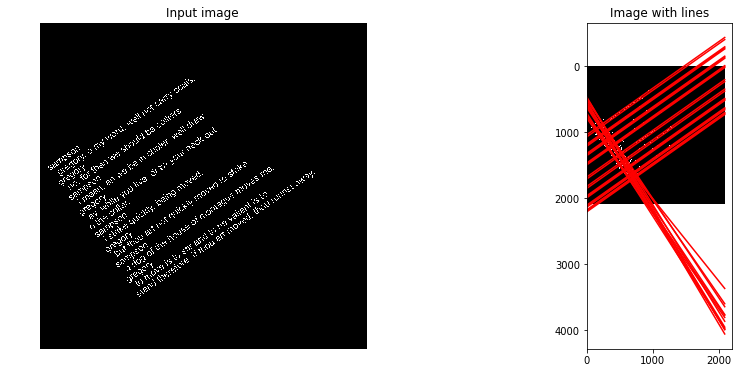

In [29]:
angles,dists = hough_angles_dists(img)
plot_with_lines(img,angles,dists)

In [33]:
img_str,orig_img_str = streighten_text_images(img,orig_img)

In [41]:
line = straight_image_to_lines(img_str)[1]
line= trim_img_arr(line,0)

>To split paragraph into lines, lines into words and words into letters I project letters on appropriate axis.

In [42]:
projected = np.average(line,0)

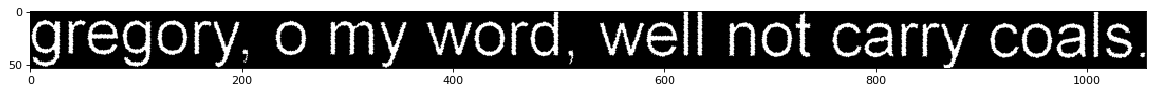

In [43]:
set_big_plot()
plot_gray(line)

In [44]:
plotly_sums(threshold(projected,5)/255)

In [9]:
img_words,orig_img_words = straight_images_to_words(str_img,str_original_img,font_size=60)  # list

/home/jacko/.local/lib/python3.5/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



# OCRing
generated letters just before flattening, and being injected to model :

/home/jacko/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning:

The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.



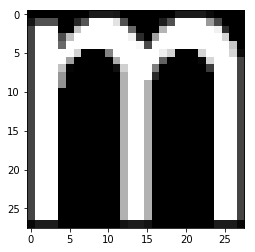

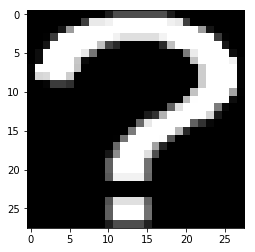

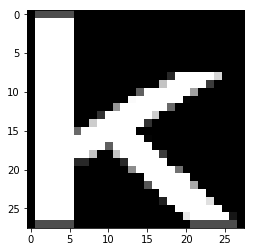

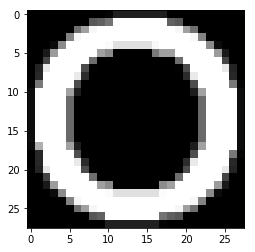

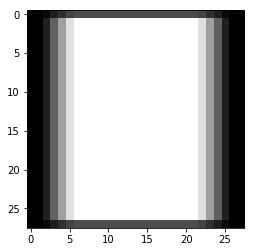

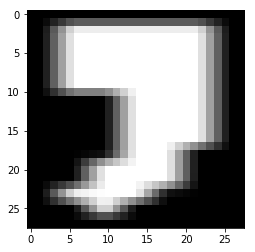

In [49]:
for letter in "m?kol,":
    img,ratio = to_test_img_and_ratio(text_img(letter))
    plot_gray(img)


* To perform ocr i split image into lines → words → letters, 
* then I use keras to classify them,
* then I simply put letters →words →lines→ text back together.